In [93]:
# IDEA: Add neck to the posture map?
from IPython import get_ipython

# %matplotlib qt
%load_ext autoreload
%autoreload 2

import time, os, sys, shutil
from utils.fitting_utils import *

# for math and plotting
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#%matplotlib notebook
#%matplotlib widget
import scipy.stats as stats

from itertools import compress # for list selection with logical
from tqdm import tqdm

from multiprocessing import Process

# and pytorch
import torch

import sys, os, pickle
# import cv2
from colour import Color
import h5py
from tqdm import tqdm, tqdm_notebook
import glob
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import pickle    
predictor_stack = pickle.load(open('model_masters/predictor_stack.p', "rb"))  # save it into a file named save.p


i_neuron = 1
binned_spikes = np.load('model_masters/binned_spikes_i_neuron_{}.npy'.format(i_neuron))

fps = 60
n_neurons = 31

In [95]:
# color the predictors

pcolor = ['red'] * 5 + ['teal'] * 5 + ['green'] * 5 + ['peru'] * 10 + ['teal'] * 5 + ['green'] * 5 + ['peru'] * 10 

from palettable.colorbrewer.sequential import Blues_8
from palettable.colorbrewer.diverging import Spectral_5
from palettable.cartocolors.qualitative import Bold_10
from palettable.tableau import Tableau_10,GreenOrange_6


cmpl = Tableau_10.mpl_colors
cmpl = GreenOrange_6.mpl_colors
for ii in range(len(pcolor)):
    if pcolor[ii] == 'red':
        pass
#         pcolor[ii] = cmpl[3]
    if pcolor[ii] == 'teal':
        pcolor[ii] = cmpl[2] 
        pcolor[ii] = 'navy' 
    if pcolor[ii] == 'green':
        pcolor[ii] = cmpl[0]
    if pcolor[ii] == 'peru':
        pcolor[ii] = cmpl[1]   


/home/chrelli/anaconda2/envs/mousepose/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  app.launch_new_instance()


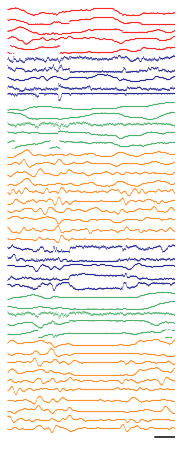

In [96]:
# plot traces of all the predictors!

plt.figure(figsize=(3,8))
n_p = len(predictor_stack)
for i_p,p in enumerate(predictor_stack):
    plt.subplot(n_p+1,1,1+i_p)
    plt.plot(p['data'][:1000],'.',c=pcolor[i_p],markersize=.2)
    plt.axis('off')
    plt.xlim([0,1000])
plt.subplot(n_p+1,1,1+i_p+1)
plt.plot(np.array([1000-2*60,1000]) , -np.ones(2),'-k')
plt.xlim([0,1000])
plt.axis('off')

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.savefig('revision_figures/glm/ptraces.png',dpi = 200,transparent = True,pad_inches=0)



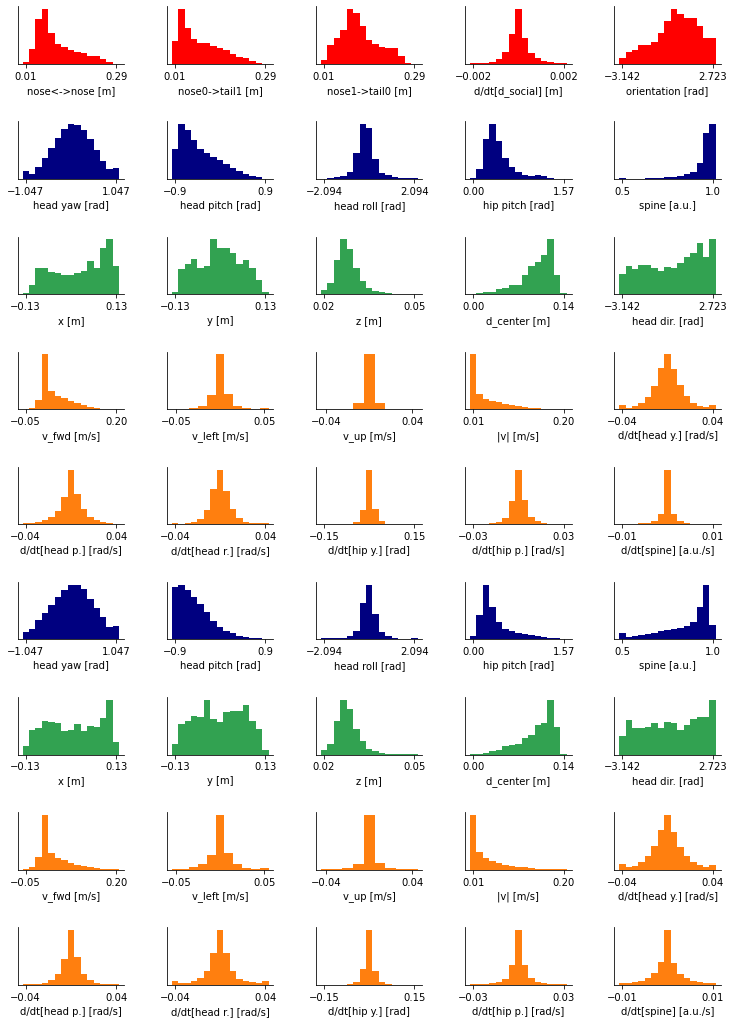

In [5]:
# plot ALL the predictors, that have been included for fitting!

n_p = len(predictor_stack)
sz = 9
plt.figure(figsize = (sz*1.4,sz*2))
for i_p,p in enumerate(predictor_stack):
    
#     i_sub = np.hstack([np.arange(1,6),np.arange(11,99)])[i_p]
    
    i_sub = 1+i_p
    
    xbins = p['xbins']
    # make firing rate!
    A = p['A']
    A_spikes = np.sum(A,axis =0)
    
    if p['type'][:2] == '1d':
        ax = plt.subplot(9,5,i_sub)
        ax.bar(xbins,A_spikes,facecolor = pcolor[i_p],width = np.median(np.diff(xbins)),align='center')
#         ax.set_xlim(xbins[[0,-1]])
        ax.set_xlabel("{} [{}]".format(p['lab'],p['unit']))
#     if p['type'] == '1d_circ':
#         ax = plt.subplot(9,5,i_sub,projection='polar')
#         ax.bar(xbins,A_spikes,facecolor = pcolor[i_p],width = np.median(np.diff(xbins)))
#         ax.set_xlim([-np.pi,np.pi])
#         ax.set_xlabel("{} [{}]".format(p['lab'],p['unit']))
#         ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2])
#         ax.set_xticklabels(['tail','right','nose','left'])
    ax.set_yticks([])
    ax.set_xticks(xbins[[0,-1]])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    
plt.subplots_adjust(hspace=1,wspace = .4)
plt.savefig('revision_figures/glm/predictors.png',dpi = 200,facecolor='w',pad_inches=10)
    


In [6]:
# # plot ALL the predictors, that have been included for fitting!

# n_p = len(predictor_stack)
# sz = 6
# plt.figure(figsize = (3*4,2.5*9))
# for i_p,p in enumerate(predictor_stack):
    
# #     i_sub = np.hstack([np.arange(1,6),np.arange(11,99)])[i_p]
    
#     i_sub = 1+i_p
    
#     xbins = p['xbins']
#     # make firing rate!
#     A = p['A']
#     A_spikes = np.zeros(A.shape[1])
#     for ii in range(A.shape[1]):
#         A_spikes[ii] = np.mean(binned_spikes[A[:,ii]])
#     A_spikes = A_spikes*fps
    
    
#     if p['type'] == '1d':
#         ax = plt.subplot(9,5,i_sub)
#         ax.bar(xbins,A_spikes,facecolor = 'k',width = np.median(np.diff(xbins)))
#         ax.set_xlim(xbins[[0,-1]])
#         ax.set_xlabel("{} [{}]".format(p['lab'],p['unit']))
#     if p['type'] == '1d_circ':
#         ax = plt.subplot(9,5,i_sub,projection='polar')
#         ax.bar(xbins,A_spikes,facecolor = 'k',width = np.median(np.diff(xbins)))
#         ax.set_xlim([-np.pi,np.pi])
#         ax.set_xlabel("{} [{}]".format(p['lab'],p['unit']))
#         ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2])
#         ax.set_xticklabels(['tail','right','nose','left'])
#     ax.set_yticks([])        
# plt.subplots_adjust(hspace=.5)
    


In [7]:


# TODO only need this for the block diagonal, is there a pure numpy/pytorch way?
from scipy.linalg import block_diag
from scipy.optimize import minimize
from utils.glm import neg_ll,jac_ll,hess_ll
from utils.glm import fold_indices,calc_fit_scores,fit_model_spec

def fit_predictor_stack_to_binned_spikes(predictor_stack,binned_spikes):
    # select what kind of model to fit!
    run_start = time.time()

    # start by testing all the 1-predictor models:
    n_predictors = len(predictor_stack)
    model_master = {'model_spec_list': [[i] for i in range(n_predictors)],
                    'model_predictor_list': [1 for i in range(n_predictors)],
                    'model_score_list': [],
                    'model_stack_list': []
                   }

    print('starting to fit 0th level (1 predictor)...')
    for i_model,model_spec in enumerate(model_master['model_spec_list']):
        print('fitting model {} of {} (0th level)...'.format(i_model,len(model_master['model_spec_list'])))

        model_scores, model_stack = fit_model_spec(model_spec,predictor_stack,binned_spikes)
        model_master['model_score_list'].append(model_scores)
#         model_master['model_stack_list'].append(model_stack)

    # now do some model selection, first model level:
    # calculate if the model is better than the flat model with a simple mean rate
    mean_llh = [model_scores['test']['mean_log_llh'] for model_scores in model_master['model_score_list'] ]
    pval_baseline = [model_scores['test']['pval_baseline'] for model_scores in model_master['model_score_list'] ]

    # best model:
    best_predictor = np.argmax(mean_llh)
    pval_best_predictor = pval_baseline[best_predictor]

    winning_spec = [ model_master['model_spec_list'][best_predictor] ]
    winning_llh = [ model_master['model_score_list'][best_predictor]['test']['log_llh'] ]
    winning_pval = [pval_best_predictor]
    winning_index = [best_predictor]

    used_predictors = [best_predictor]

    all_predictors = np.arange(n_predictors)
    next_round_predictors = all_predictors[~np.isin(all_predictors,used_predictors)]

    previous_spec = np.array(winning_spec[-1])
    new_model_specs = [np.hstack([previous_spec,ii]) for ii in next_round_predictors]
    
    # if the flat model was better, just return
    if winning_pval[0] >= 0.05:
        # after fitting, we add the model tree to the dictionary and save it for later    
        run_end = time.time()

        model_master['winning_spec'] = winning_spec
        model_master['winning_llh'] = winning_llh
        model_master['winning_pval'] = winning_pval
        model_master['winning_index'] = winning_index
        model_master['run_time'] =run_end-run_start
        model_master['binned_spikes'] = binned_spikes

        return model_master

    
    # now we loop over the rest of the models!
    for i_level in range(1,n_predictors): # because the first round is a little special due to the mean model
        # now run the fit
        endix = ['th','st','nd','rd','th','th','th','th','th','th']
        print('starting to fit {}{} level ({} predictors)...'.format(i_level,endix[i_level%10],i_level+1))
        for i_model,model_spec in enumerate(new_model_specs):
            print('fitting model {} of {} ({}{} level)...'.format(i_model,len(new_model_specs),i_level,endix[i_level%10]))
            model_scores, model_stack = fit_model_spec(model_spec,predictor_stack,binned_spikes)
            model_master['model_spec_list'].append(model_spec)
            model_master['model_predictor_list'].append(len(model_spec))
            model_master['model_score_list'].append(model_scores)
#             model_master['model_stack_list'].append(model_stack)

        # select the best model of the new fits!
        current_level = model_master['model_predictor_list'][-1]
        mean_llh = np.array([model_scores['test']['mean_log_llh'] for model_scores in model_master['model_score_list'] ])
        current_logic = np.isin(model_master['model_predictor_list'] , current_level)
        current_index = np.arange(len(current_logic))[current_logic]
        current_llh = mean_llh[current_logic]

        # some index wrangling
        best_model_index = current_index[np.argmax(current_llh)]
        best_model_scores = model_master['model_score_list'][best_model_index]
        best_model_llh = best_model_scores['test']['log_llh']
        prev_model_llh = winning_llh[-1]

        # test the new best model against the previous best one
        w_candidate,pval_candidate = sp.stats.wilcoxon(best_model_llh,prev_model_llh,alternative='greater')

        if pval_candidate >= 0.05:
            # stop if there is no improvement
            print("Candidate model was not better (p = {}),\nso we're stopping the search!".format(pval_candidate))
            # Let's save it anyway for now, for fun!
            winning_spec.append(model_master['model_spec_list'][best_model_index] )
            winning_llh.append(best_model_llh)
            winning_pval.append(pval_candidate)
            winning_index.append(best_model_index)        
            break

        else:
            # add everything to the growing model tree
            print("Candidate model was better (p = {})!\nWe will grow the tree and keep searching..".format(pval_candidate))

            # add the new best winner to the list
            winning_spec.append(model_master['model_spec_list'][best_model_index] )
            winning_llh.append(best_model_llh)
            winning_pval.append(pval_candidate)
            winning_index.append(best_model_index)

            # get everything ready to do the next round
            all_predictors = np.arange(n_predictors)
            used_predictors = winning_spec[-1]
            next_round_predictors = all_predictors[~np.isin(all_predictors,used_predictors)]

            previous_spec = np.array(winning_spec[-1])
            new_model_specs = [np.hstack([previous_spec,ii]) for ii in next_round_predictors]

    # after fitting, we add the model tree to the dictionary and save it for later    
    run_end = time.time()

    model_master['winning_spec'] = winning_spec
    model_master['winning_llh'] = winning_llh
    model_master['winning_pval'] = winning_pval
    model_master['winning_index'] = winning_index
    model_master['run_time'] =run_end-run_start
    model_master['binned_spikes'] = binned_spikes
    
    return model_master

/home/chrelli/git/3ddd_mouse_tracker/analysis/utils/analysis_tools.py:74: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  matplotlib.rcParams['mathtext.fallback_to_cm'] = False
/home/chrelli/git/3ddd_mouse_tracker/analysis/utils/analysis_tools.py:74: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  matplotlib.rcParams['mathtext.fallback_to_cm'] = False
/home/chrelli/git/3ddd_mouse_tracker/analysis/utils/analysis_tools.py:74: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  matplotlib.rcParams['mathtext.fallback_to_cm'] = False


In [8]:
# predictor_stack = [predictor_stack[0], predictor_stack[1], predictor_stack[2]]

In [9]:

import pickle
# for i_neuron in [4]:
for i_neuron in np.flipud(np.arange(n_neurons)):
#     if dict is already done, don't do it again...
    
    pickle_name = "model_masters/New45pred_i_neuron_{}.p".format(i_neuron)

    if os.path.exists(pickle_name):
        print("i_neuron {} already done".format(i_neuron))
        continue
        
    binned_spikes = np.load('model_masters/binned_spikes_i_neuron_{}.npy'.format(i_neuron))
    
    model_master = fit_predictor_stack_to_binned_spikes(predictor_stack,binned_spikes)
    
    # dump the saved dicts
    pickle.dump(model_master, open(pickle_name, "wb"))  # save it into a file named save.p


i_neuron 30 already done
i_neuron 29 already done
i_neuron 28 already done
i_neuron 27 already done
i_neuron 26 already done
i_neuron 25 already done
i_neuron 24 already done
i_neuron 23 already done
i_neuron 22 already done
i_neuron 21 already done
i_neuron 20 already done
i_neuron 19 already done
i_neuron 18 already done
i_neuron 17 already done
i_neuron 16 already done
i_neuron 15 already done
i_neuron 14 already done
i_neuron 13 already done
i_neuron 12 already done
i_neuron 11 already done
i_neuron 10 already done
i_neuron 9 already done
i_neuron 8 already done
i_neuron 7 already done
i_neuron 6 already done
i_neuron 5 already done
i_neuron 4 already done
i_neuron 3 already done
i_neuron 2 already done
i_neuron 1 already done
i_neuron 0 already done


[0]
[0 7]
[ 0  7 26]
[ 0  7 26 22]
[ 0  7 26 22  1]


/home/chrelli/anaconda2/envs/mousepose/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chrelli/anaconda2/envs/mousepose/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


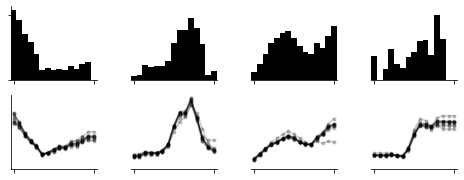

[0]
[0 4]
[ 0  4 23]
[ 0  4 23 16]
[ 0  4 23 16 28]
[ 0  4 23 16 28 26]


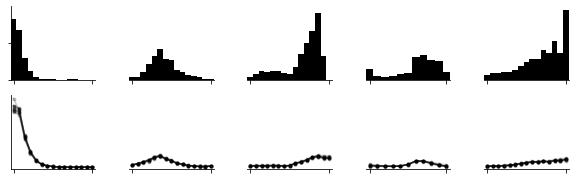

In [10]:
def plot_winning_model(model_master,predictor_stack):
    # after fitting, we save the winning models
    winning_spec = model_master['winning_spec']
    winning_llh = model_master['winning_llh'] 
    winning_pval = model_master['winning_pval']
    winning_index =model_master['winning_index'] 
    binned_spikes = model_master['binned_spikes']


    # also get the names!

    model_master['winning_names']  = []
    for spec in winning_spec:
        print(spec)
        p_names = []
        for ii in spec:
            p_names.append(predictor_stack[ii]['name'])
        model_master['winning_names'].append(p_names)

    # AND we calculate all the tuning curves (marginalizing out the effect of the others)
    # 1D tuning curves!

    model_master['winning_curves']  = []
    model_master['winning_xbins']  = []
    model_master['winning_A_spikes'] = []
    model_master['winning_units']  = []

    spec = winning_spec[-1]
    model = model_master['model_score_list'][winning_index[-1]]
    winning_curves = np.vstack(model['param_holder'])
    tuning = np.mean(winning_curves,axis = 0)
    nsub_running = 0
    for i_predic in spec:
        p = predictor_stack[i_predic]
        xbins = p['xbins']

        nsub = p['nsub']
        sub_index = np.arange(nsub)+nsub_running

        nsub_running += nsub

        model_master['winning_curves'].append(winning_curves[:,sub_index])
        model_master['winning_xbins'].append(xbins)


        # also add the 'RAW' counts
        # get the A_matrix (that's the binning)
        A = p['A']
        # now, use that binning to segment the firing rate
        A_spikes = np.zeros(A.shape[1])
        for ii in range(A.shape[1]):
            A_spikes[ii] = np.mean(binned_spikes[A[:,ii]])

        model_master['winning_A_spikes'].append(A_spikes)


    n_win = len(winning_spec[-1])
    plt.figure(figsize=(3*n_win,3*2))
    for i in range(n_win):
        xbins,curves = model_master['winning_xbins'][i],model_master['winning_curves'][i]
        A_spikes = model_master['winning_A_spikes'][i]

        # make firing rate!
        A_spikes = A_spikes * fps

        plt.subplot(2,n_win,1+i)
        plt.bar(xbins,A_spikes,facecolor = 'k',width = np.median(np.diff(xbins)))
        plt.xlim(xbins[[0,-1]])
        if i == 0:
            plt.ylabel('Firing rate [Hz]')

    #     plt.ylim([0,1])

        plt.subplot(2,n_win,n_win+1+i)
        for ii in range(curves.shape[0]):
            plt.plot(xbins,np.exp(curves[ii,:]),'o-k')


        name = model_master['winning_names'][-1][i]

        for p in predictor_stack: # TODO not so nice
            if p['name'] == name:
                unit = p['unit']

        name = model_master['winning_names'][-1][i]
        plt.xlabel("{} [{}]".format(name,unit))
    #     plt.xticks(xbins)
        plt.ylim([0,None])
        plt.xlim(xbins[[0,-1]])
#         plt.ylim([0,1.2])
        plt.grid()
        if i == 0:
            plt.ylabel('exp(beta)')
        plt.title("p = {:0.2g}\n(Wilcoxon,\n10 fold cross val)".format(winning_pval[i]))

        # make a common x-axis?
        plt.subplots_adjust(hspace=.5)
        plt.savefig('revision_figures/glm/example_neuron.png',dpi = 200,facecolor='w',pad_inches=10)

    plt.show()

    
# also plot the progress over time of the log ll

def plot_ll_increase(model_master,predictor_stack,i_neuron):

    
    winning_llh = model_master['winning_llh'] 
    pval = model_master['winning_pval']
    spec = model_master['winning_spec'][-1]

    plt.figure(figsize = (len(spec)/2,2))
#     plt.figure(figsize = (3,3))
    
    winning_score = []

    for i_ll,ll in enumerate(winning_llh):
        jitter = .1*np.random.normal(size = len(ll))
        plt.plot(1+i_ll*np.ones_like(ll)+jitter,ll,'ok',markersize = 3)
        plt.plot(1+i_ll+np.array([-.4,.4]),np.ones(2)*np.mean(ll),'-k')

    plt.plot(np.array([-.4,.4]),np.zeros(2),'-k')

    ax = plt.gca()
#     ax.set_ylabel('lambda_LR')
    labels = ['mean rate']
    print(spec)
    for i_p in spec:
        p = predictor_stack[i_p]
        
        labels.append("add {}?".format(p['name']))
    print(labels)
    ax.set_xticks(np.arange(len(labels)))
#     ax.set_xticklabels(labels,rotation = -90)
    
    
    ax.set_xticklabels('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    # plot the p-values
    print(pval)

    # for p in 

    plt.axhline(0,color = 'k',linestyle = ':')

    plt.savefig('revision_figures/glm/example_ll_{}.png'.format(i_neuron),dpi = 200,facecolor='w',pad_inches=10)

    plt.show()

    
from utils.spikes import ax_paint_common_yaxis
    
def plot_winning_model_only(model_master,predictor_stack,i_neuron):
    # after fitting, we save the winning models
    winning_spec = model_master['winning_spec']
    winning_llh = model_master['winning_llh'] 
    winning_pval = model_master['winning_pval']
    winning_index =model_master['winning_index'] 
    binned_spikes = model_master['binned_spikes']


    # also get the names!

    model_master['winning_names']  = []
    for spec in winning_spec:
        print(spec)
        p_names = []
        for ii in spec:
            p_names.append(predictor_stack[ii]['name'])
        model_master['winning_names'].append(p_names)

    # AND we calculate all the tuning curves (marginalizing out the effect of the others)
    # 1D tuning curves!

    model_master['winning_curves']  = []
    model_master['winning_xbins']  = []
    model_master['winning_A_spikes'] = []
    model_master['winning_units']  = []

    spec = winning_spec[-2]
    model = model_master['model_score_list'][winning_index[-1]]
    winning_curves = np.vstack(model['param_holder'])
    tuning = np.mean(winning_curves,axis = 0)
    nsub_running = 0
    for i_predic in spec:
        p = predictor_stack[i_predic]
        xbins = p['xbins']

        nsub = p['nsub']
        sub_index = np.arange(nsub)+nsub_running

        nsub_running += nsub

        model_master['winning_curves'].append(winning_curves[:,sub_index])
        model_master['winning_xbins'].append(xbins)


        # also add the 'RAW' counts
        # get the A_matrix (that's the binning)
        A = p['A']
        # now, use that binning to segment the firing rate
        A_spikes = np.zeros(A.shape[1])
        for ii in range(A.shape[1]):
            A_spikes[ii] = np.mean(binned_spikes[A[:,ii]])

        model_master['winning_A_spikes'].append(A_spikes)


    n_win = len(winning_spec[-2])
    plt.figure(figsize=(2*n_win,3))
    
    curve_axes = []
    psth_axes = []

    for i in range(n_win):
        xbins,curves = model_master['winning_xbins'][i],model_master['winning_curves'][i]
        A_spikes = model_master['winning_A_spikes'][i]

        # make firing rate!
        A_spikes = A_spikes * fps

        plt.subplot(2,n_win,1+i)
        ax = plt.gca()
        psth_axes.append(ax)
        plt.bar(xbins,A_spikes,facecolor = 'k',width = np.median(np.diff(xbins)))
#         plt.xlim(xbins[[0,-1]])
        plt.xlim(np.array(xbins[[0,-1]]) + np.array([-1,1])/2 * np.median(np.diff(xbins)) )

        plt.xticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')
        
        ax.set_yticklabels('')
        if i == 0:
            pass
#             plt.ylabel('Firing rate [Hz]')
        else:  
            plt.yticks([])
            ax.spines['left'].set_visible(False)
    #     plt.ylim([0,1])
        ax.set_xticks(xbins[[0,-1]])

        plt.subplot(2,n_win,n_win+1+i)
        ax = plt.gca()
        curve_axes.append(ax)
        for ii in range(curves.shape[0]):
            plt.plot(xbins,np.exp(curves[ii,:]),'o-',c='k',alpha = .2,markersize = 3)


        name = model_master['winning_names'][-1][i]

        for p in predictor_stack: # TODO not so nice
            if p['name'] == name:                                          
                unit = p['unit']

        name = model_master['winning_names'][-1][i]
#         plt.xlabel("{} [{}]".format(name,unit))
    #     plt.xticks(xbins)
        plt.ylim([0,None])
        plt.xlim(np.array(xbins[[0,-1]]) + np.array([-1,1])/2 * np.median(np.diff(xbins)) )
        ax.set_xticks(xbins[[0,-1]])
        ax.set_yticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels('')

        if i == 0:
            pass
#             plt.ylabel('Firing rate [Hz]')
        else:  
            plt.yticks([])
            ax.spines['left'].set_visible(False)        
        
#         plt.ylim([0,1.2])
#         plt.grid()
        if i == 0:
            pass
#             plt.ylabel('exp(beta)')
        else:
            plt.yticks([]) 
                    
    # make a common x-axis?
    ax_paint_common_yaxis(curve_axes)
    ax_paint_common_yaxis(psth_axes)

    plt.subplots_adjust(wspace=.4)
    plt.savefig('revision_figures/glm/example_neuron_{}.png'.format(i_neuron),dpi = 200,transparent=True,pad_inches=10)

        
    plt.show()

    
# also plot the progress over time of the log ll
   
# for i_neuron in range(n_neurons):
# for i_neuron in [4]:
# for i_neuron in [4]:
for i_neuron in [4,13]:

#     if dict is already done, don't do it again...
    pickle_path = "model_masters/New45pred_i_neuron_{}.p".format(i_neuron)
    if not os.path.exists(pickle_path):
        print(pickle_path)
        continue
    model_master = pickle.load(open(pickle_path, "rb"))  # save it into a file named save.p
#     plot_winning_model(model_master,predictor_stack)    
    plot_winning_model_only(model_master,predictor_stack,i_neuron)    
#     plot_ll_increase(model_master,predictor_stack,i_neuron)


In [11]:
# loop across and count them    
predictor_counting = []
for i_neuron in range(n_neurons):
#     if dict is already done, don't do it again...
    pickle_path = "model_masters/New45pred_i_neuron_{}.p".format(i_neuron)
    if not os.path.exists(pickle_path):
        print(pickle_path)
        continue
    model_master = pickle.load(open(pickle_path, "rb"))  # save it into a file named save.p
    
    # get the winning predictors
    spec = model_master['winning_spec'][-1]
    pval = model_master['winning_pval']
    
    if pval[0] >= 0.05:
        predictor_counting.append([])
    else:
        predictor_counting.append(spec[:-1])


In [12]:
spec = model_master['winning_spec'][-1]
pval = model_master['winning_pval']

In [13]:
all_counts = np.hstack(predictor_counting)
centers = np.arange(45)
count = np.zeros(45)
for i in range(45):
    count[i] = np.sum(all_counts == i)

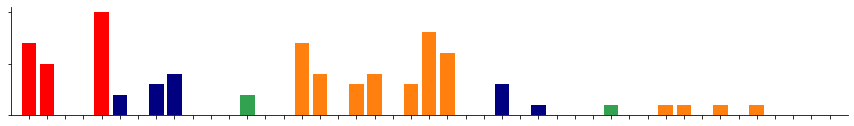

In [14]:
plt.figure(figsize = (15,2))
for i in range(45):
    plt.bar(centers[i],count[i],align='center',facecolor = pcolor[i])
plt.xlim([-1,45])
plt.xticks(np.arange(45))
ax = plt.gca()
# ax.set_xticklabels([p['lab'] for p in predictor_stack],rotation = -90)
# ax.set_ylabel("N of 31 neurons coding")
# ax.set_xlabel("Behavioral feature")
ax.set_xticklabels("")
ax.set_yticklabels("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('revision_figures/glm/encoding_bars.png',dpi = 200,transparent=True,pad_inches=10)

plt.show()

In [15]:
# extract the tuning curve of a single predictor!

def extract_tuning_curve(model_master,predictor_stack):
    # the winning model will be the 2nd to last one
    # after fitting, we save the winning models
    winning_spec = model_master['winning_spec'][:-1]
    # winning_llh = model_master['winning_llh'] 
    # winning_pval = model_master['winning_pval']
    winning_index =model_master['winning_index'] 
    # binned_spikes = model_master['binned_spikes']

    model = model_master['model_score_list'][winning_index[-2]]
    winning_curves = np.vstack(model['param_holder'])
    tuning = np.mean(winning_curves,axis = 0)


    model_master['winning_curves']  = []
    model_master['winning_xbins']  = []
    model_master['winning_A_spikes'] = []
    model_master['winning_units']  = []
    model_master['tuning_curves']  = []

    spec = winning_spec[-1]
    model = model_master['model_score_list'][winning_index[-1]]
    winning_curves = np.vstack(model['param_holder'])
    tuning = np.mean(winning_curves,axis = 0)
    nsub_running = 0
    for i_predic in spec:
        p = predictor_stack[i_predic]
        xbins = p['xbins']

        nsub = p['nsub']
        sub_index = np.arange(nsub)+nsub_running

        nsub_running += nsub

        model_master['winning_curves'].append(winning_curves[:,sub_index])
        model_master['tuning_curves'].append(tuning[sub_index])

        model_master['winning_xbins'].append(xbins)

    return spec,model_master['tuning_curves'],model_master['winning_xbins'] 




In [16]:
# AH otherwise it doesn't make new empty lists #TODO maybe do this in a nice way
tuning_curve_holder = [[]]
for i in range(45-1):
    tuning_curve_holder.append([])

for i_neuron in range(n_neurons):
    ps = predictor_counting[i_neuron]
    
    pickle_path = "model_masters/New45pred_i_neuron_{}.p".format(i_neuron)
    if not os.path.exists(pickle_path):
        print(pickle_path)
        continue
    model_master = pickle.load(open(pickle_path, "rb"))  # save it into a file named save.p

    if not ps == []:
#         print(ps)
        pp,tuning,xbins = extract_tuning_curve(model_master,predictor_stack)
#         print(pp)
        for i_p,tc in zip(pp,tuning):
#             print(i_p)
            tuning_curve_holder[i_p].append(np.exp(tc))



/home/chrelli/anaconda2/envs/mousepose/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


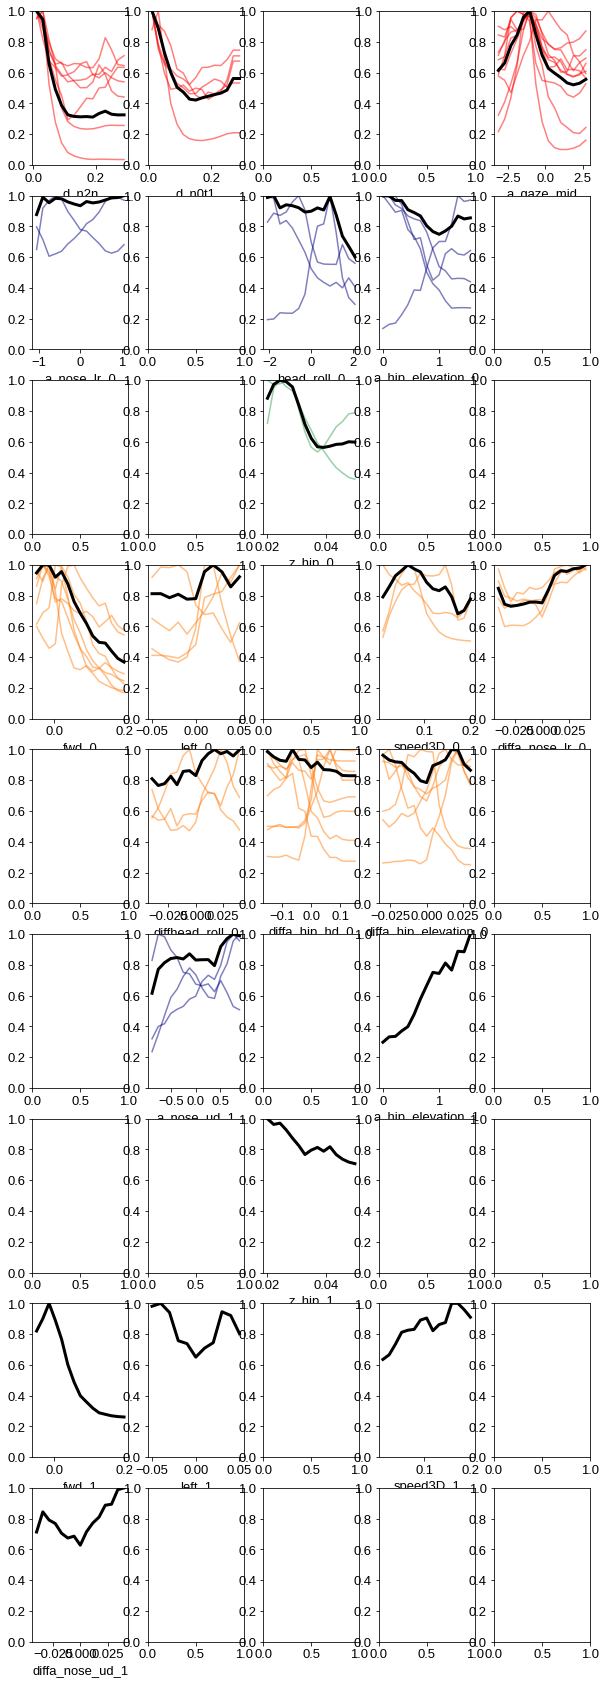

In [17]:
# social predictors
plt.figure(figsize = (10,30))
for i_p in range(45):
    plt.subplot(9,5,1+i_p)
    p = predictor_stack[i_p]
    for tc in tuning_curve_holder[i_p]:
        plt.plot(p['xbins'],tc/np.max(tc),'-', c = pcolor[i_p],alpha = 0.5)
        plt.xlabel(p['name'])
        plt.ylim([0,1])
    
    if not tuning_curve_holder[i_p] == []:
        mean_tuning = np.mean(np.vstack(tuning_curve_holder[i_p]), axis = 0)
        plt.plot(p['xbins'],mean_tuning/np.max(mean_tuning),'-', c = 'k',alpha = 1,lw = 3)

plt.savefig('revision_figures/glm/all_tuning.png',dpi = 200,facecolor='w',pad_inches=10)
    
    

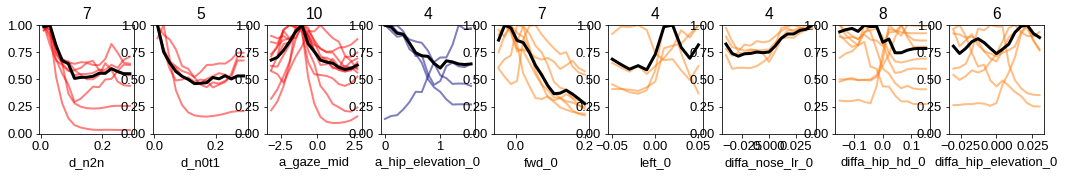

In [19]:
# social predictors
plt.figure(figsize = (18,2))
subcount = 0
for i_p in range(45):
    if len(tuning_curve_holder[i_p]) < 4:
        continue
    plt.subplot(1,9,1+subcount)
    subcount +=1
    p = predictor_stack[i_p]
    for tc in tuning_curve_holder[i_p]:
        plt.plot(p['xbins'],tc/np.max(tc),'-', c = pcolor[i_p],lw=2,alpha = 0.5)
        plt.xlabel(p['name'])
        plt.ylim([0,1])
        plt.title(len(tuning_curve_holder[i_p]))
    if not tuning_curve_holder[i_p] == []:
        mean_tuning = np.median(np.vstack(tuning_curve_holder[i_p]), axis = 0)
        plt.plot(p['xbins'],mean_tuning/np.max(mean_tuning),'-', c = 'k',alpha = 1,lw = 3)
        


plt.savefig('revision_figures/glm/selected_tuning.png',dpi = 200,transparent=True)
        

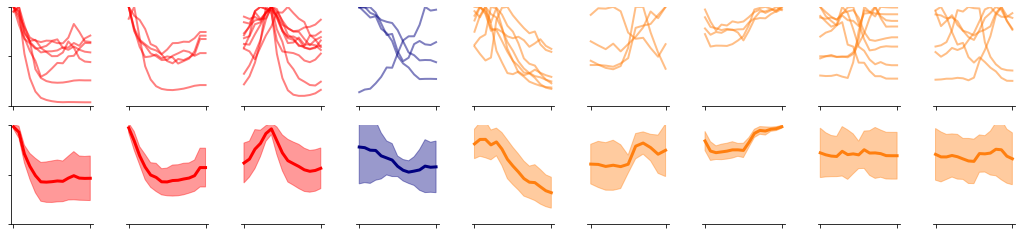

In [20]:
# social predictors with means below!
plt.figure(figsize = (18,4))
subcount = 0
for i_p in range(45):
    if len(tuning_curve_holder[i_p]) < 4:
        continue
    plt.subplot(2,9,1+subcount)
    p = predictor_stack[i_p]
    for tc in tuning_curve_holder[i_p]:
        
        curve = tc
        curve = curve/np.max(curve)
        
        plt.plot(p['xbins'],curve,'-', c = pcolor[i_p],lw=2,alpha = 0.5)
#         plt.xlabel(p['name'])
#         plt.ylim([0,1])
    
    plt.ylim([0,1])
    xbins = p['xbins']

    ax = plt.gca()
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xlim(np.array(xbins[[0,-1]]) + np.array([-1,1])/2 * np.median(np.diff(xbins)) )
    ax.set_xticks(xbins[[0,-1]])
    if subcount > 0:
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])

    plt.subplot(2,9,9+1+subcount)
    
    if not tuning_curve_holder[i_p] == []:
        
        curves = np.vstack(tuning_curve_holder[i_p])
        curves = curves/np.max(curves,axis = 1)[:,np.newaxis]
        xbins = p['xbins']
        mean_tuning = np.mean(curves, axis = 0)
        std_tuning = np.std(curves, axis = 0)
        
        plt.plot(p['xbins'],mean_tuning,'-', c= pcolor[i_p],lw=3,alpha = 1)
        
        
        xx = np.hstack([p['xbins'],np.flipud(p['xbins'])])
        yy = np.hstack([mean_tuning+std_tuning,np.flipud(mean_tuning-std_tuning)])
        plt.fill(xx,yy,c= pcolor[i_p],alpha = .4)
#         plt.plot(p['xbins'],(mean_tuning+std_tuning),'-', c = 'k',alpha = 1,lw = 3)
#         plt.plot(p['xbins'],(mean_tuning-std_tuning),'-', c = 'k',alpha = 1,lw = 3)
        
        plt.ylim([0,1])
        ax = plt.gca()
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        plt.xlim(np.array(xbins[[0,-1]]) + np.array([-1,1])/2 * np.median(np.diff(xbins)) )
        ax.set_xticks(xbins[[0,-1]])
        if subcount > 0:
            ax.spines['left'].set_visible(False)
            ax.set_yticks([])

#     plt.subplot(3,9,18+1+subcount)
#     ax = plt.gca()
#     xbins = p['xbins']
#     # make firing rate!
#     A = p['A']
#     A_spikes = np.sum(A,axis =0)
    
#     if p['type'][:2] == '1d':
#         ax.bar(xbins,A_spikes,facecolor = pcolor[i_p],width = np.median(np.diff(xbins)),align='center')
# #         ax.set_xlim(xbins[[0,-1]])
#         ax.set_xlabel("{} [{}]".format(p['lab'],p['unit']))

    subcount +=1

plt.subplots_adjust(wspace = .4)
plt.savefig('revision_figures/glm/selected_doubletuning.png',dpi = 200,transparent=True)
        

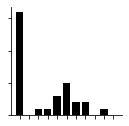

5.0


In [32]:
# plot how many neurons are coding for N features:
plt.figure(figsize = (2,2) )
encoding_features = []
index = np.arange(0,11)
for i_features in index:
    rcount = 0
    for i_neuron in range(n_neurons):
        ps = predictor_counting[i_neuron]
        if len(ps) == i_features:
            rcount += 1
    encoding_features.append(rcount)
encoding_features=np.array(encoding_features)

plt.bar(index,encoding_features,facecolor = 'k')
# plt.ylim([0,1])
plt.xticks(index)
# plt.xlabel('Encoding at least N features')
# plt.ylabel('prop. of neurons')

ax = plt.gca()
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('revision_figures/glm/n_encoding.png',dpi = 200,transparent = True
            ,pad_inches=10)
plt.show()

n_per_cell = np.array([len(x) for x in predictor_counting])
print(np.median(n_per_cell[n_per_cell>0]))

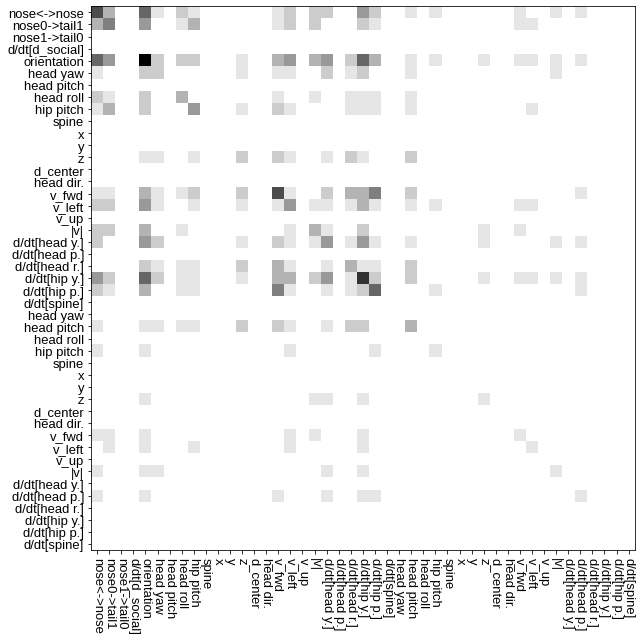

In [33]:
# make a graph matrix
graph_matrix = np.zeros((45,45))

for i_neuron in range(n_neurons):
    ps = predictor_counting[i_neuron]
    if len(ps) > 0:
        for i_p in ps:
            graph_matrix[i_p,ps] += 1 

all_names = [p['lab'] for p in predictor_stack]

# make unique!

plt.figure(figsize = (10,10) )
plt.imshow(graph_matrix,cmap='binary')
plt.xticks(np.arange(45))
plt.yticks(np.arange(45))
ax = plt.gca()
ax.set_yticklabels(all_names)
ax.set_xticklabels(all_names,rotation = -90)
plt.savefig('revision_figures/glm/encoding_matrix.png',dpi = 200,facecolor='w',pad_inches=10)

plt.show()

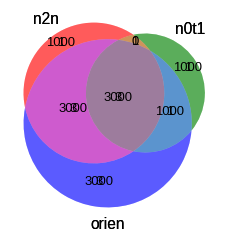

In [80]:
# Make a venn diag from n2n, n0t1 and angle


submatrix = graph_matrix[:5,:5]

# we know the pairs from the matrix
manual_counts = np.matrix([[7,3,6],[3,5,4],[6,4,10]])

# we need to know the tiplets as well! the indeces are 0,1,4
n_triples = np.sum([np.sum(np.isin(x,[0]))*np.sum(np.isin(x,[1]))*np.sum(np.isin(x,[4])) for x in predictor_counting])
n_doubles = np.sum([np.sum(np.isin(x,[0]))*np.sum(np.isin(x,[4])) for x in predictor_counting])
n_singles = np.sum([np.sum(np.isin(x,[0])) for x in predictor_counting])

from matplotlib_venn import venn3
# ordering of the numbers are (100, 010, 110, 001, 101, 011, 111).
# ugh so complicated
venn3(subsets = (1,1,0,3,3,1,3), set_labels = ('n2n', 'n0t1', 'orien'))



venn3(subsets = (1000,1000,1,3000,3000,1000,3000), set_labels = ('n2n', 'n0t1', 'orien'))

plt.savefig('revision_figures/glm/venn_ish.png',dpi = 200,facecolor='w',pad_inches=10)


In [ ]:
# Also try counting up the head orientation and sweeping


n_singles = np.sum([np.sum(np.isin(x,[0])) for x in predictor_counting])
n_singles = np.sum([np.sum(np.isin(x,[0])) for x in predictor_counting])
n_singles = np.sum([np.sum(np.isin(x,[0])) for x in predictor_counting])

# Make a venn diag from n2n, n0t1 and angle


submatrix = graph_matrix[:5,:5]

# we know the pairs from the matrix
manual_counts = np.matrix([[7,3,6],[3,5,4],[6,4,10]])

# we need to know the tiplets as well! the indeces are 0,1,4
n_triples = np.sum([np.sum(np.isin(x,[0]))*np.sum(np.isin(x,[1]))*np.sum(np.isin(x,[4])) for x in predictor_counting])
n_doubles = np.sum([np.sum(np.isin(x,[0]))*np.sum(np.isin(x,[4])) for x in predictor_counting])
n_singles = np.sum([np.sum(np.isin(x,[0])) for x in predictor_counting])

from matplotlib_venn import venn3
# ordering of the numbers are (100, 010, 110, 001, 101, 011, 111).
# ugh so complicated
venn3(subsets = (1,1,0,3,3,1,3), set_labels = ('n2n', 'n0t1', 'orien'))



venn3(subsets = (1000,1000,1,3000,3000,1000,3000), set_labels = ('n2n', 'n0t1', 'orien'))

plt.savefig('revision_figures/glm/venn_ish.png',dpi = 200,facecolor='w',pad_inches=10)


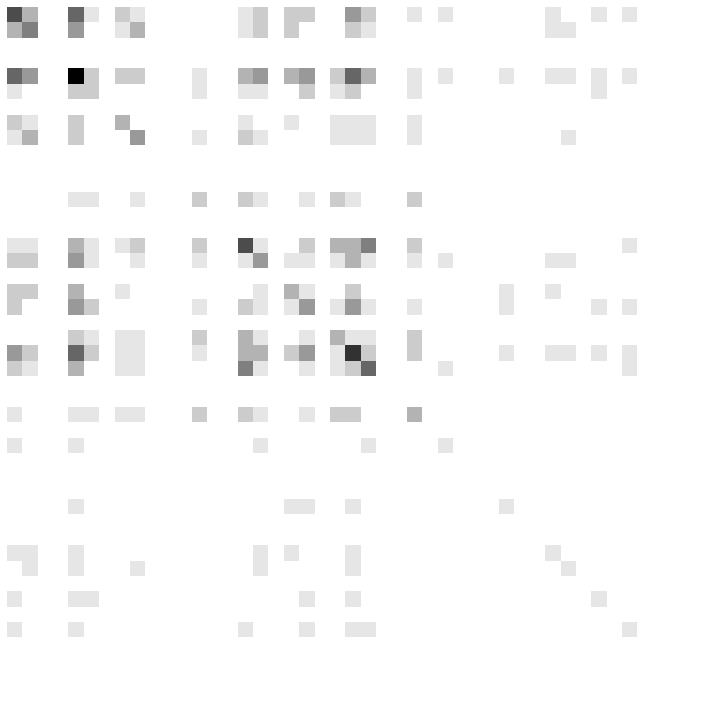

In [82]:
# make a graph matrix
graph_matrix = np.zeros((45,45))

for i_neuron in range(n_neurons):
    ps = predictor_counting[i_neuron]
    if len(ps) > 0:
        for i_p in ps:
            graph_matrix[i_p,ps] += 1 

all_names = [p['lab'] for p in predictor_stack]

# make unique!

plt.figure(figsize = (10,10) )
plt.imshow(graph_matrix,cmap='binary')
# plt.imshow(graph_matrix)

plt.xticks(np.arange(45))
plt.yticks(np.arange(45))
ax = plt.gca()
ax.set_yticklabels(all_names)
# ax.set_xticklabels(all_names,rotation = -90)
plt.axis('off')
plt.tight_layout()
plt.savefig('revision_figures/glm/encoding_matrix_nolabels.png',dpi = 200,transparent =True,pad_inches=10)

plt.show()

In [83]:
# check that the counting is correct!
print(count)
print(np.diagonal(graph_matrix))

[ 7.  5.  0.  0. 10.  2.  0.  3.  4.  0.  0.  0.  2.  0.  0.  7.  4.  0.
  3.  4.  0.  3.  8.  6.  0.  0.  3.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  1.  0.  1.  0.  1.  0.  0.  0.  0.]
[ 7.  5.  0.  0. 10.  2.  0.  3.  4.  0.  0.  0.  2.  0.  0.  7.  4.  0.
  3.  4.  0.  3.  8.  6.  0.  0.  3.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  1.  0.  1.  0.  1.  0.  0.  0.  0.]


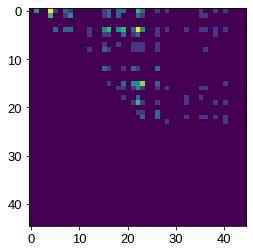

In [84]:
# now, plot the network as a graph
# the diagonal is the N of neurons that encode that feature (size of nodes)
# the off-diagnorals are the strength of connection between the nodes (edge weight)
# the colors should be
# first we make the nodes!
import networkx as nx

# we get a matrix of the off diagonal
test = np.zeros((45,45))
for i in range(45):
    for j in range(i+1,45):
        weight = graph_matrix[i,j]
        test[i,j] = weight
n_node_edges = np.sum(test,axis = 1)
plt.imshow(test)



node_diag = np.diagonal(graph_matrix)

off_diag_count = np.sum(graph_matrix,axis =1) - node_diag

i_node = np.hstack(np.argwhere(node_diag > 0)).astype('int')
node_size = node_diag[i_node]
node_color = np.array(pcolor)[i_node]



In [85]:
unique_names = ['hmm']*45
for i in range(45):
    if np.isin(i,np.arange(0,5)):
        unique_names[i] = all_names[i]
    if np.isin(i,np.arange(5,25)):
        unique_names[i] = all_names[i] + " (self)"
    if np.isin(i,np.arange(25,45)):
        unique_names[i] = all_names[i] + " (partner)"
   

In [86]:
# now make the nodes on the graph!
G = nx.Graph()
G.clear()
# loop over nodes and add them

     
# node_names = []
# # for i in i_node:
# for i in range(len(unique_names)):
# #     G.add_node(i)
#     G.add_node(unique_names[i])
# #     print(unique_names[i])
#     node_names.append(unique_names[i])
# print(node_names)
# print(i_node)
# print(node_size)

# loop over the upper triangle and add the edges!

test = np.zeros((45,45))

for i in range(45):
    for j in range(i+1,45):
        weight = graph_matrix[i,j]
        test[i,j] = weight
        if weight >0:
#             G.add_edge(i, j,weight=weight)
            G.add_edge(unique_names[i],unique_names[j],weight = weight)

# plt.imshow(test)        
len(i_node)
G.nodes()

NodeView(('nose<->nose', 'nose0->tail1', 'orientation', 'head yaw (self)', 'head roll (self)', 'hip pitch (self)', 'v_fwd (self)', 'v_left (self)', '|v| (self)', 'd/dt[head y.] (self)', 'd/dt[hip y.] (self)', 'd/dt[hip p.] (self)', 'head pitch (partner)', 'hip pitch (partner)', 'v_fwd (partner)', '|v| (partner)', 'd/dt[head p.] (partner)', 'v_left (partner)', 'z (self)', 'd/dt[head r.] (self)', 'z (partner)'))

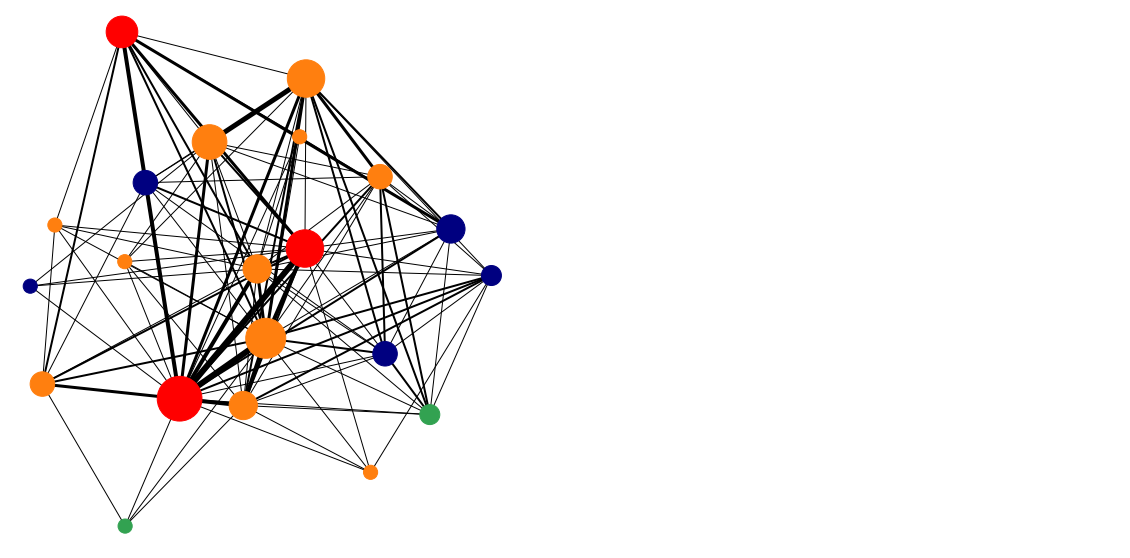

In [88]:
edge_weights = 1*np.array([G[u][v]['weight'] for u,v in G.edges()])

from networkx.drawing.nx_agraph import graphviz_layout
# from networkx.drawing.nx_pydot import graphviz_layout
pos = nx.circular_layout(G)
# pos = nx.spectral_layout(G)
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)

node_size = []
node_color = []
for name in pos.keys():
    node_size.append(node_diag[np.isin(unique_names,name)])
    node_color.append(np.array(pcolor)[np.isin(unique_names,name)][0])

node_size = np.array(node_size)*200    
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
nx.draw(G,pos, width = edge_weights,node_color = node_color, node_size = node_size)

plt.subplot(1,2,2)
plt.axis('off')
# nx.draw(G,pos,alpha = 0.3, width = edge_weights,edge_color = 'k',
#         node_color = node_color, node_size = node_size)

# for i_name,name in enumerate(pos.keys()):
#     x,y = pos[name]
#     shift = np.sqrt(node_size[i_name])/10
#     plt.text(x,y+.02,s=name,color='w',fontsize = 14, fontweight = 2, 
#              bbox=dict(edgecolor=node_color[i_name],facecolor=node_color[i_name], alpha=.9),
#              horizontalalignment='center')

plt.savefig('revision_figures/glm/network_graph.png',dpi = 200,transparent=True,pad_inches=10)
plt.show()

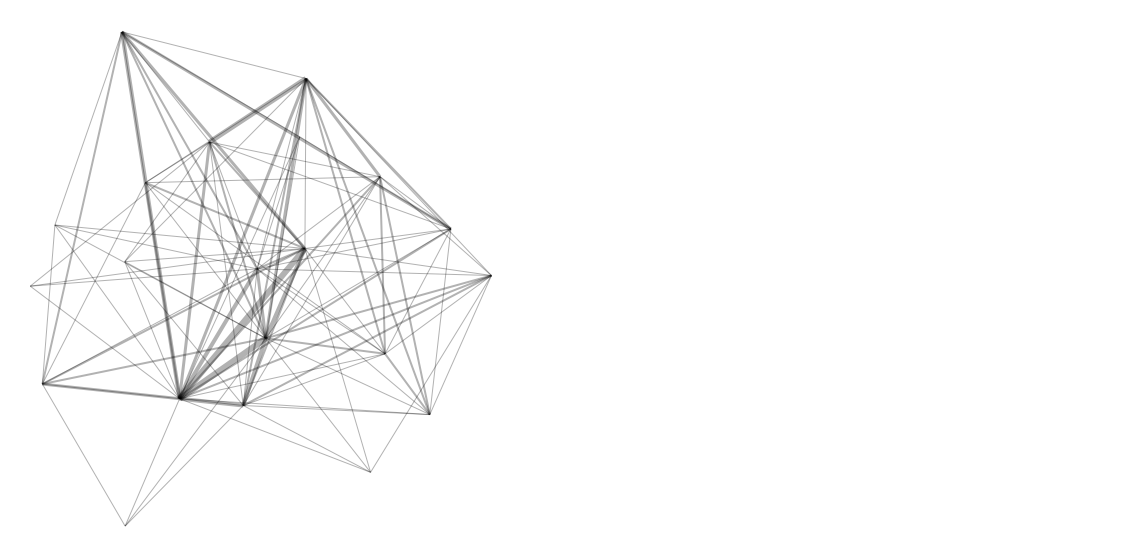

In [92]:
edge_weights = 1*np.array([G[u][v]['weight'] for u,v in G.edges()])

from networkx.drawing.nx_agraph import graphviz_layout
# from networkx.drawing.nx_pydot import graphviz_layout
pos = nx.circular_layout(G)
# pos = nx.spectral_layout(G)
pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)

node_size = []
node_color = []
for name in pos.keys():
    node_size.append(node_diag[np.isin(unique_names,name)])
    node_color.append(np.array(pcolor)[np.isin(unique_names,name)][0])

node_size = np.array(node_size)*200    
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
nx.draw(G,pos,alpha = 0.3, node_color = None, width = edge_weights, node_size = 0)

plt.subplot(1,2,2)
plt.axis('off')
# nx.draw(G,pos,alpha = 0.3, width = edge_weights,edge_color = 'k',
#         node_color = node_color, node_size = node_size)

# for i_name,name in enumerate(pos.keys()):
#     x,y = pos[name]
#     shift = np.sqrt(node_size[i_name])/10
#     plt.text(x,y+.02,s=name,color='w',fontsize = 14, fontweight = 2, 
#              bbox=dict(edgecolor=node_color[i_name],facecolor=node_color[i_name], alpha=.9),
#              horizontalalignment='center')

plt.savefig('revision_figures/glm/network_graph_transp.png',dpi = 200,transparent=True,pad_inches=10)
plt.show()